In [9]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-07-19.csv')
df.columns

Index(['fips', 'county_name', 'state', 'division', 'region',
       'vaccine_hesitant', 'vaccine_hesitant_strong',
       'vaccine_hesitant_category', 'social_vulnerability_index',
       'ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian',
       'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white',
       'population', 'birth_rate', 'unemployment', 'rural_urban_code',
       'urban_influence_code', 'median_income_percent_state', 'median_income',
       'poverty', 'education_high_school_less', 'education_high_school_only',
       'education_degree_some', 'education_bachelors_degree', 'religion_total',
       'religion_evangelical', 'religion_mainline_protestant',
       'election_democrat_wins', 'election_republican_wins',
       'election_total_2008', 'election_dem_2008', 'election_gop_2008',
       'election_oth_2008', 'election_total_2012', 'election_dem_2012',
       'election_gop_2012', 'election_oth_2012', 'election_total_2016',
       'election_dem_2016', 'electio

## QQ Plots

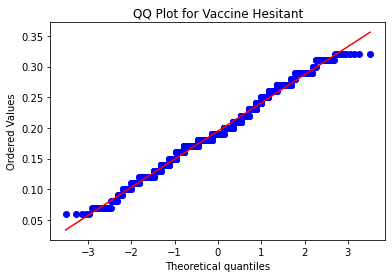

In [10]:
stats.probplot(x=df['vaccine_hesitant'], dist='norm', plot=plt)
plt.title('QQ Plot for Vaccine Hesitant')
plt.show()

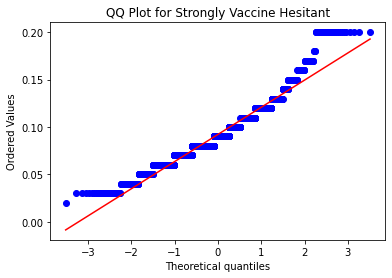

In [11]:
stats.probplot(x=df['vaccine_hesitant_strong'], dist='norm', plot=plt)
plt.title('QQ Plot for Strongly Vaccine Hesitant')
plt.show()

## Box-Cox Lambda transformation

In [15]:
transformed_vaccine_hesitant, lambda_vaccine_hesitant = stats.boxcox(df['vaccine_hesitant'])
transformed_vaccine_hesitant_strong, lambda_vaccine_hesitant_strong = stats.boxcox(df['vaccine_hesitant_strong'])
lambda_vaccine_hesitant, lambda_vaccine_hesitant_strong

(0.8265990742746657, 0.3313582508560165)

## Linear Regression
### Vaccine Hesitant

In [3]:
formula_hesitant = 'vaccine_hesitant ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins'
model_hesitant = sm.ols(formula=formula_hesitant, data=df)
fitted_hesitant = model_hesitant.fit()
print(fitted_hesitant.summary())

                            OLS Regression Results                            
Dep. Variable:       vaccine_hesitant   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:49:29   Log-Likelihood:                 5932.8
No. Observations:                3075   AIC:                        -1.183e+04
Df Residuals:                    3057   BIC:                        -1.172e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Tak

### Strongly Vaccine Hesitant

In [4]:
formula_hesitant_strong = 'vaccine_hesitant_strong ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins'
model_hesitant_strong = sm.ols(formula=formula_hesitant_strong, data=df)
fitted_hesitant_strong = model_hesitant_strong.fit()
print(fitted_hesitant_strong.summary())

                               OLS Regression Results                              
Dep. Variable:     vaccine_hesitant_strong   R-squared:                       0.278
Model:                                 OLS   Adj. R-squared:                  0.274
Method:                      Least Squares   F-statistic:                     69.34
Date:                     Mon, 19 Jul 2021   Prob (F-statistic):          1.25e-201
Time:                             17:49:29   Log-Likelihood:                 7000.9
No. Observations:                     3075   AIC:                        -1.397e+04
Df Residuals:                         3057   BIC:                        -1.386e+04
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------